#  Business Understanding





In the telecom industry, customer churn remains one of the most significant challenges due to intense competition and evolving customer expectations. Churn not only leads to revenue loss but also increases the cost of acquiring new customers, which is far higher than retaining existing ones. Predicting churn and understanding the underlying causes are essential for implementing proactive retention strategies and enhancing customer satisfaction.

This machine learning project focuses on reproducing and expanding upon findings from key research papers that explore customer churn prediction using data-driven methods. By analyzing a telecom customer churn dataset—consisting of attributes like account duration, international plan subscription, call usage, service charges, customer service interactions, and churn status—the project aims to achieve the following:
*   Build effective churn prediction models to identify at-risk customers.
*   Analyze key attributes influencing churn behavior (e.g., service plans, call patterns, or customer support usage).
*   Offer actionable insights to optimize customer retention efforts and reduce churn rates.

The outcome of this analysis will empower telecom providers to anticipate churn early, focus on high-risk customers, and tailor their strategies to improve customer loyalty and business performance.



In [105]:
# =============================
# 1. Essential Libraries
# =============================
import numpy as np
import pandas as pd
import warnings

# =============================
# 2. Data Visualization
# =============================
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Interactive Visualization
import plotly.figure_factory as ff
import plotly.io as pio
import plotly.graph_objs as go
import plotly.express as px

# =============================
# 3. Preprocessing
# =============================
from sklearn.preprocessing import (
    OrdinalEncoder, LabelEncoder, MinMaxScaler
)

# =============================
# 4. Feature Selection
# =============================
from sklearn.feature_selection import (
    SelectKBest, chi2, mutual_info_classif, SelectFromModel
)

# =============================
# 5. Model Training & Evaluation
# =============================
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Ensemble Models
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,
    BaggingClassifier
)

# Boosting Libraries
import xgboost as xgb
import lightgbm as lgb
from xgboost import XGBClassifier

# =============================
# 6. Model Selection & Validation
# =============================
from sklearn.model_selection import (
    train_test_split, GridSearchCV
)

# =============================
# 7. Model Evaluation Metrics
# =============================
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    roc_auc_score, cohen_kappa_score, classification_report,
    roc_curve, auc, confusion_matrix
)

# =============================
# 8. Other Utilities
# =============================
from math import ceil
import itertools
import pickle

# =============================
# 9. General Settings
# =============================
warnings.filterwarnings("ignore")  # Suppress all warnings
sns.set_theme(style="whitegrid")   # Set default seaborn style
plt.style.use("seaborn-v0_8-pastel")  # Set matplotlib style


In [5]:

# Load the datasets

df_80 = pd.read_csv('/content/sample_data/churn-bigml-80.csv')
df_20 = pd.read_csv('/content/sample_data/churn-bigml-20.csv')




# Data Understanding

## 1) Data Overview

In [6]:
# Display basic information about the datasets
def display_basic_info(df, name):
    print(f"\nDataset: {name}")
    print("-" * 40)
    print(f"Shape: {df.shape}")
    print("\nData Types:")
    print(df.dtypes)
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nSummary Statistics:")
    print(df.describe())

# Display information for both datasets
display_basic_info(df_20, 'churn-bigml-20')
display_basic_info(df_80, 'churn-bigml-80')


Dataset: churn-bigml-20
----------------------------------------
Shape: (667, 20)

Data Types:
State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

Missing Values:
State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes        

*   State: The US state in which the customer resides.
*   Account length:The number of days the customer has had an active account with the telecom service provider.
*   Area code: The telephone area code assigned to the customer.
*   International plan: Whether the customer is subscribed to an international calling plan (Yes/No).
*   Voice mail plan: Whether the customer has subscribed to a voicemail plan (Yes/No).
*   Number vmail messages: The number of voicemail messages the customer has received.
*   Total day minutes: The total minutes used by the customer during the day for calls.
*   Total day calls: The total number of calls made by the customer during the day.
*   Total day charge: The total charge incurred by the customer for daytime calls.
*   Total eve minutes: The total minutes used by the customer during the evening for calls.
*   Total eve calls: The total number of calls made by the customer during the evening.
*   Total eve charge: The total charge incurred by the customer for evening calls.
*   Total night minutes: The total minutes used by the customer during the night for calls.
*   Total night calls: The total number of calls made by the customer during the night.
*   Total night charge: The total charge incurred by the customer for nighttime calls.
*   Total intl minutes: The total minutes used by the customer for international calls.
*   Total intl calls: The total number of international calls made by the customer.
*   Total intl charge: The total charge incurred by the customer for international calls.
*   Customer service calls: The total number of calls the customer has made to customer service.
*   Churn: Whether the customer discontinued their service with the company (Yes/No).

## 2) Exploratory data Analysis

 data distribution

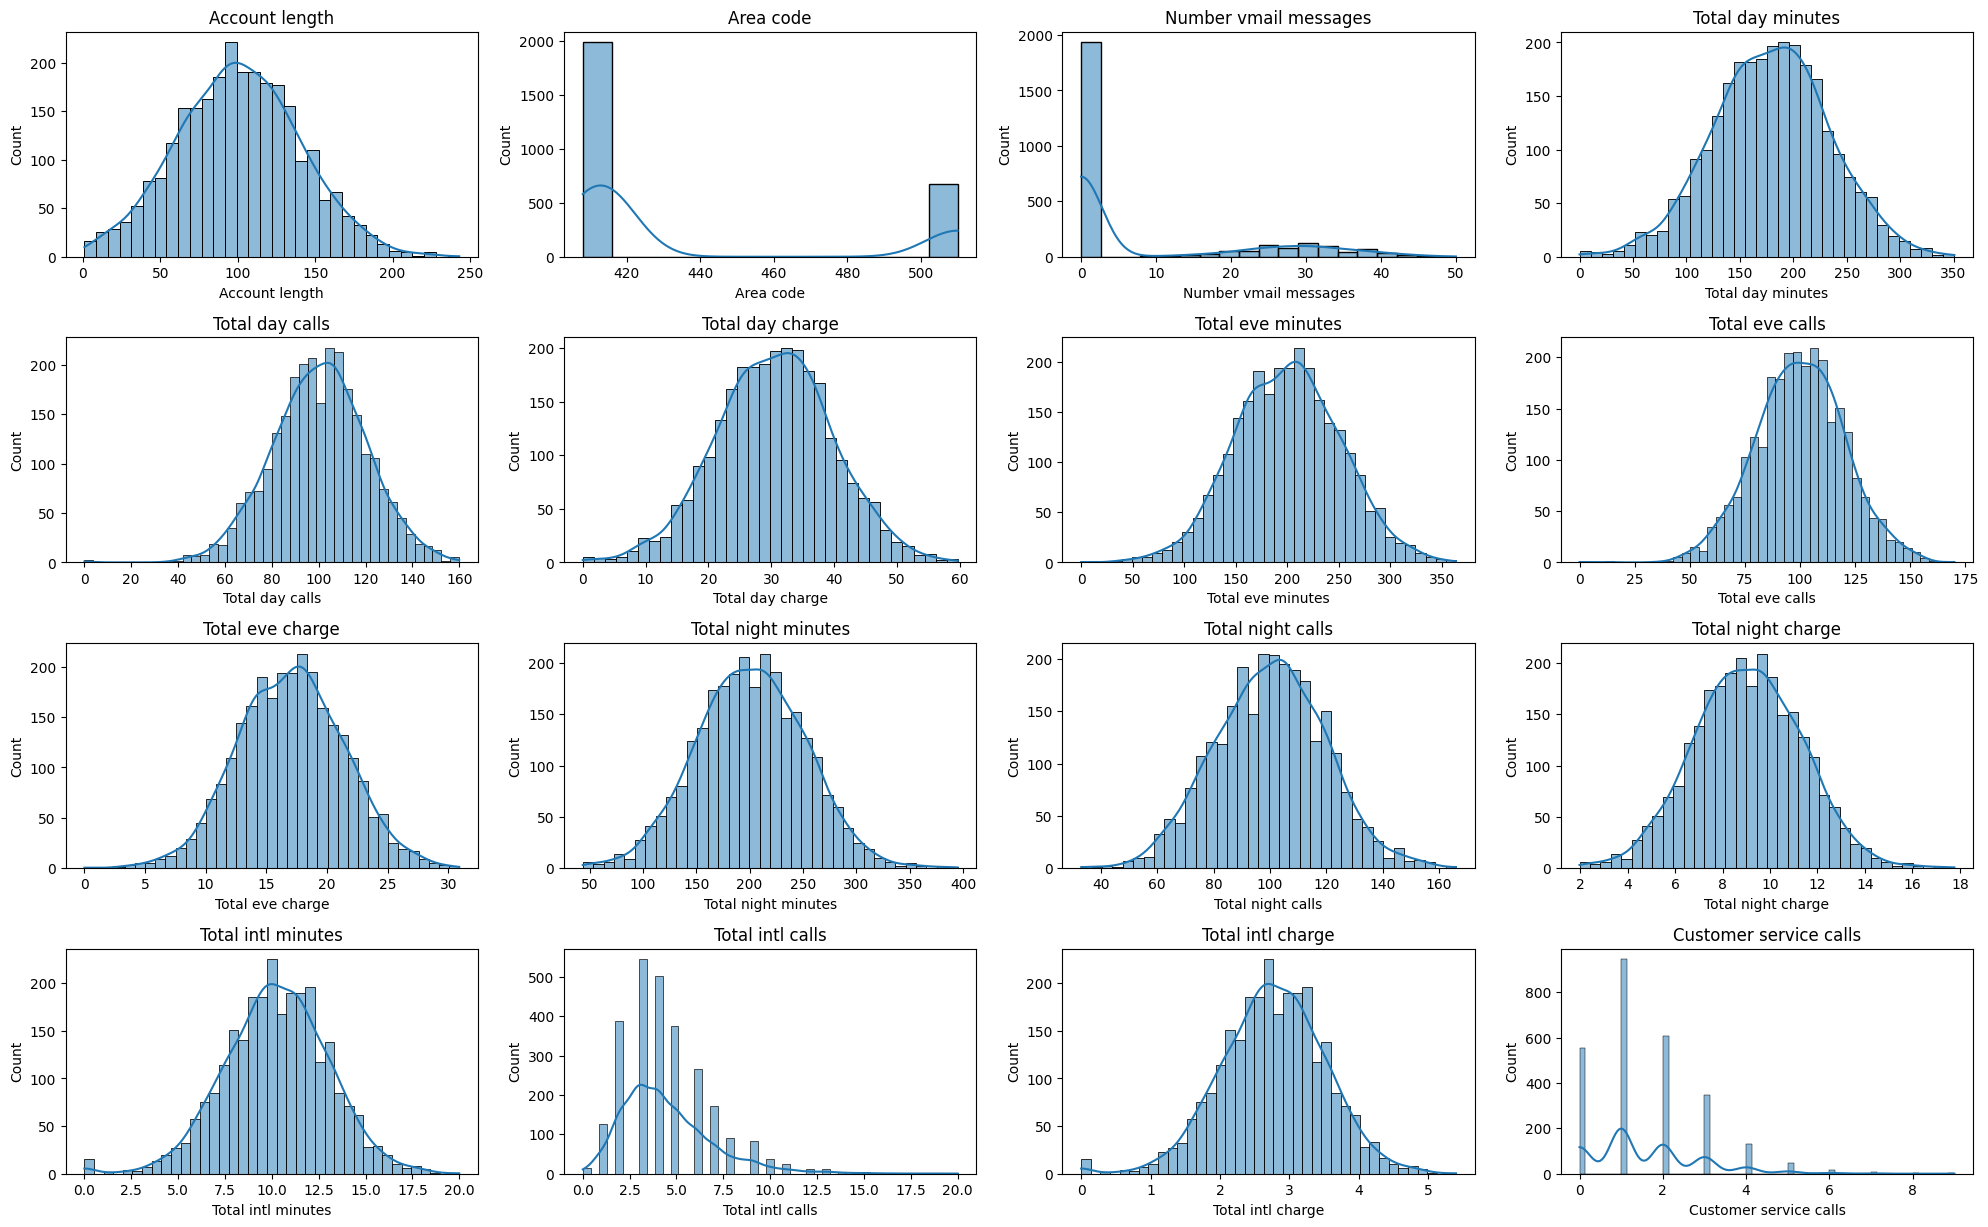

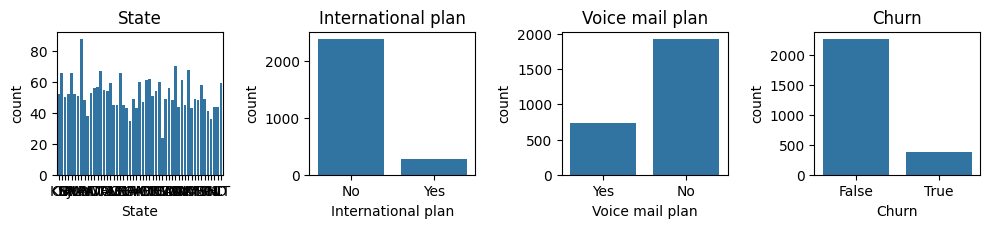

In [7]:
# Identify numerical and categorical columns
numerical_columns = df_80.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df_80.select_dtypes(include=[object, 'bool']).columns.tolist()

# Plot distribution of numerical features
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)
    sns.histplot(df_80[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

# Plot distribution of categorical features
plt.figure(figsize=(10, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(5, 4, i)
    sns.countplot(x=df_80[column])
    plt.title(column)
plt.tight_layout()
plt.show()

The histograms for the numerical columns in the churn-bigml-80 dataset reveal that most of the columns do not follow a normal distribution


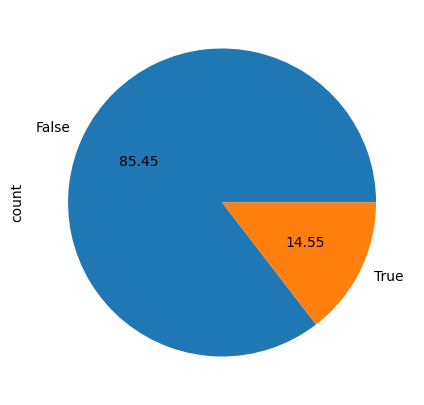

In [8]:
# Visualization of pie charts regarding service status targets for Churn customers
# View classes from Telco Customer Churn
df_80['Churn'].value_counts().plot(kind='pie', figsize=(5,5), autopct='%.2f')
sns.set_theme(style="darkgrid")

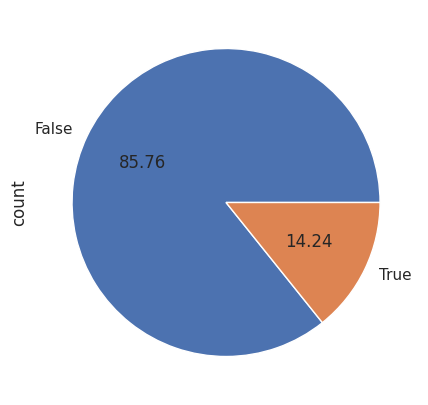

In [9]:
# Visualization of pie charts regarding service status targets for Churn customers
# View classes from Telco Customer Churn
df_20['Churn'].value_counts().plot(kind='pie', figsize=(5,5), autopct='%.2f')
sns.set_theme(style="darkgrid")

# Data Preparation

1) data cleaning

missing values:

In [10]:
# Calculate the percentage of missing values in each column
missing_percentage = df_80.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage.sort_values(ascending=False)

,0


In [11]:
missing_percentage_20 = df_20.isnull().mean() * 100
missing_percentage_20 = missing_percentage_20[missing_percentage_20 > 0]
missing_percentage_20.sort_values(ascending=False)

,0


handling outliers

In [12]:
# Function to create box plots for outliers
import plotly.express as px
import plotly.graph_objects as go
def plot_outliers(df, title):
    fig = go.Figure()
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        fig.add_trace(go.Box(y=df[column], name=column))
    fig.update_layout(title=title, yaxis_title='Values')
    return fig

# Plot outliers for df_80 and df_20
fig_80 = plot_outliers(df_80, 'Outliers in churn-bigml-80')
fig_20 = plot_outliers(df_20, 'Outliers in churn-bigml-20')

fig_80.show()
fig_20.show()

we chose to i
mpute the outliers with the median because the median is a robust measure of central tendency that is not influenced by extreme values.

In [13]:
# Function to impute outliers using the IQR method
def impute_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median_value = df[column].median()
        df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median_value, df[column])
    return df

# Numerical columns in the dataset
numerical_columns = [
    'Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls',
    'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge',
    'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes',
    'Total intl calls', 'Total intl charge', 'Customer service calls'
]

# Impute outliers in the numerical columns
df_80_imputed = impute_outliers(df_80.copy(), numerical_columns)
df_20_imputed = impute_outliers(df_20.copy(), numerical_columns)

df_80_imputed.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128.0,415,No,Yes,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,False
1,OH,107.0,415,No,Yes,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,False
2,NJ,137.0,415,No,No,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,False
3,OH,84.0,408,Yes,No,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,False
4,OK,75.0,415,Yes,No,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,False


In [14]:
# Impute outliers in the numerical columns
df_80_imputed = impute_outliers(df_80.copy(), numerical_columns)
df_20_imputed = impute_outliers(df_20.copy(), numerical_columns)

# Plot outliers for df_80_imputed and df_20_imputed
fig_80_imputed = plot_outliers(df_80_imputed, 'Outliers in churn-bigml-80 after Imputation')
fig_20_imputed = plot_outliers(df_20_imputed, 'Outliers in churn-bigml-20 after Imputation')

fig_80_imputed.show()
fig_20_imputed.show()

In [15]:
# Identify categorical features and their types (ordered or unordered)
categorical_features = df_80.select_dtypes(include=['object']).columns

# Determine if categorical features are ordered or unordered
categorical_types = {}
for feature in categorical_features:
    unique_values = df_80[feature].unique()
    if pd.api.types.is_categorical_dtype(df_80[feature]) and df_80[feature].cat.ordered:
        categorical_types[feature] = 'Ordered'
    else:
        categorical_types[feature] = 'Unordered'

categorical_types

<ipython-input-15-39c8fc76a3eb>:8: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



{'State': 'Unordered',
 'International plan': 'Unordered',
 'Voice mail plan': 'Unordered'}

2) data transformation

data encoding

In [16]:


# Identify categorical features
categorical_features = ['State', 'International plan', 'Voice mail plan']

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the categorical features for df_80_imputed
encoded_80 = encoder.fit_transform(df_80_imputed[categorical_features])
encoded_df_80 = df_80_imputed.copy()
encoded_df_80[categorical_features] = encoded_80

# Transform the categorical features for df_20_imputed
encoded_20 = encoder.transform(df_20_imputed[categorical_features])
encoded_df_20 = df_20_imputed.copy()
encoded_df_20[categorical_features] = encoded_20

# Encode the Churn feature
encoded_df_80['Churn'] = encoded_df_80['Churn'].astype(int)
encoded_df_20['Churn'] = encoded_df_20['Churn'].astype(int)

# Keep the original order of the columns
encoded_df_80 = encoded_df_80[df_80_imputed.columns]
encoded_df_20 = encoded_df_20[df_20_imputed.columns]

encoded_df_80.head()
encoded_df_20.head()



,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,18.0,117.0,408,0.0,0.0,0.0,184.5,97.0,31.37,203.7,80.0,17.31,215.8,90.0,9.71,8.7,4.0,2.35,1.0,0
1,15.0,65.0,415,0.0,0.0,0.0,129.1,137.0,21.95,228.5,83.0,19.42,208.8,111.0,9.40,12.7,6.0,3.43,1.0,1
2,34.0,161.0,415,0.0,0.0,0.0,178.3,67.0,30.31,317.8,97.0,27.01,160.6,128.0,7.23,5.4,9.0,1.46,1.0,1
3,40.0,111.0,415,0.0,0.0,0.0,110.4,103.0,18.77,137.3,102.0,11.67,189.6,105.0,8.53,7.7,6.0,2.08,2.0,0
4,11.0,49.0,510,0.0,0.0,0.0,119.3,117.0,20.28,215.1,109.0,18.28,178.7,90.0,8.04,11.1,1.0,3.00,1.0,0


feautre scaling : Normalization

In [17]:


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical features for encoded_df_80
scaled_80 = scaler.fit_transform(encoded_df_80)
scaled_df_80 = pd.DataFrame(scaled_80, columns=encoded_df_80.columns)

# Transform the numerical features for encoded_df_20
scaled_20 = scaler.transform(encoded_df_20)
scaled_df_20 = pd.DataFrame(scaled_20, columns=encoded_df_20.columns)

scaled_df_80.head()
scaled_df_20.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,0.36,0.568627,0.000000,0.0,0.0,0.0,0.515630,0.476190,0.515702,0.515262,0.301887,0.515177,0.561901,0.403846,0.561835,0.380282,0.4,0.386243,0.333333,0.0
1,0.30,0.313725,0.068627,0.0,0.0,0.0,0.321040,0.857143,0.321074,0.605378,0.330189,0.605387,0.536109,0.605769,0.536446,0.661972,0.6,0.671958,0.333333,1.0
2,0.68,0.784314,0.068627,0.0,0.0,0.0,0.493853,0.190476,0.493802,0.929869,0.462264,0.929885,0.358511,0.769231,0.358722,0.147887,0.9,0.150794,0.333333,1.0
3,0.80,0.539216,0.068627,0.0,0.0,0.0,0.255357,0.533333,0.255372,0.273983,0.509434,0.274049,0.465365,0.548077,0.465192,0.309859,0.6,0.314815,0.666667,0.0
4,0.22,0.235294,1.000000,0.0,0.0,0.0,0.286617,0.666667,0.286570,0.556686,0.575472,0.556648,0.425203,0.403846,0.425061,0.549296,0.1,0.558201,0.333333,0.0


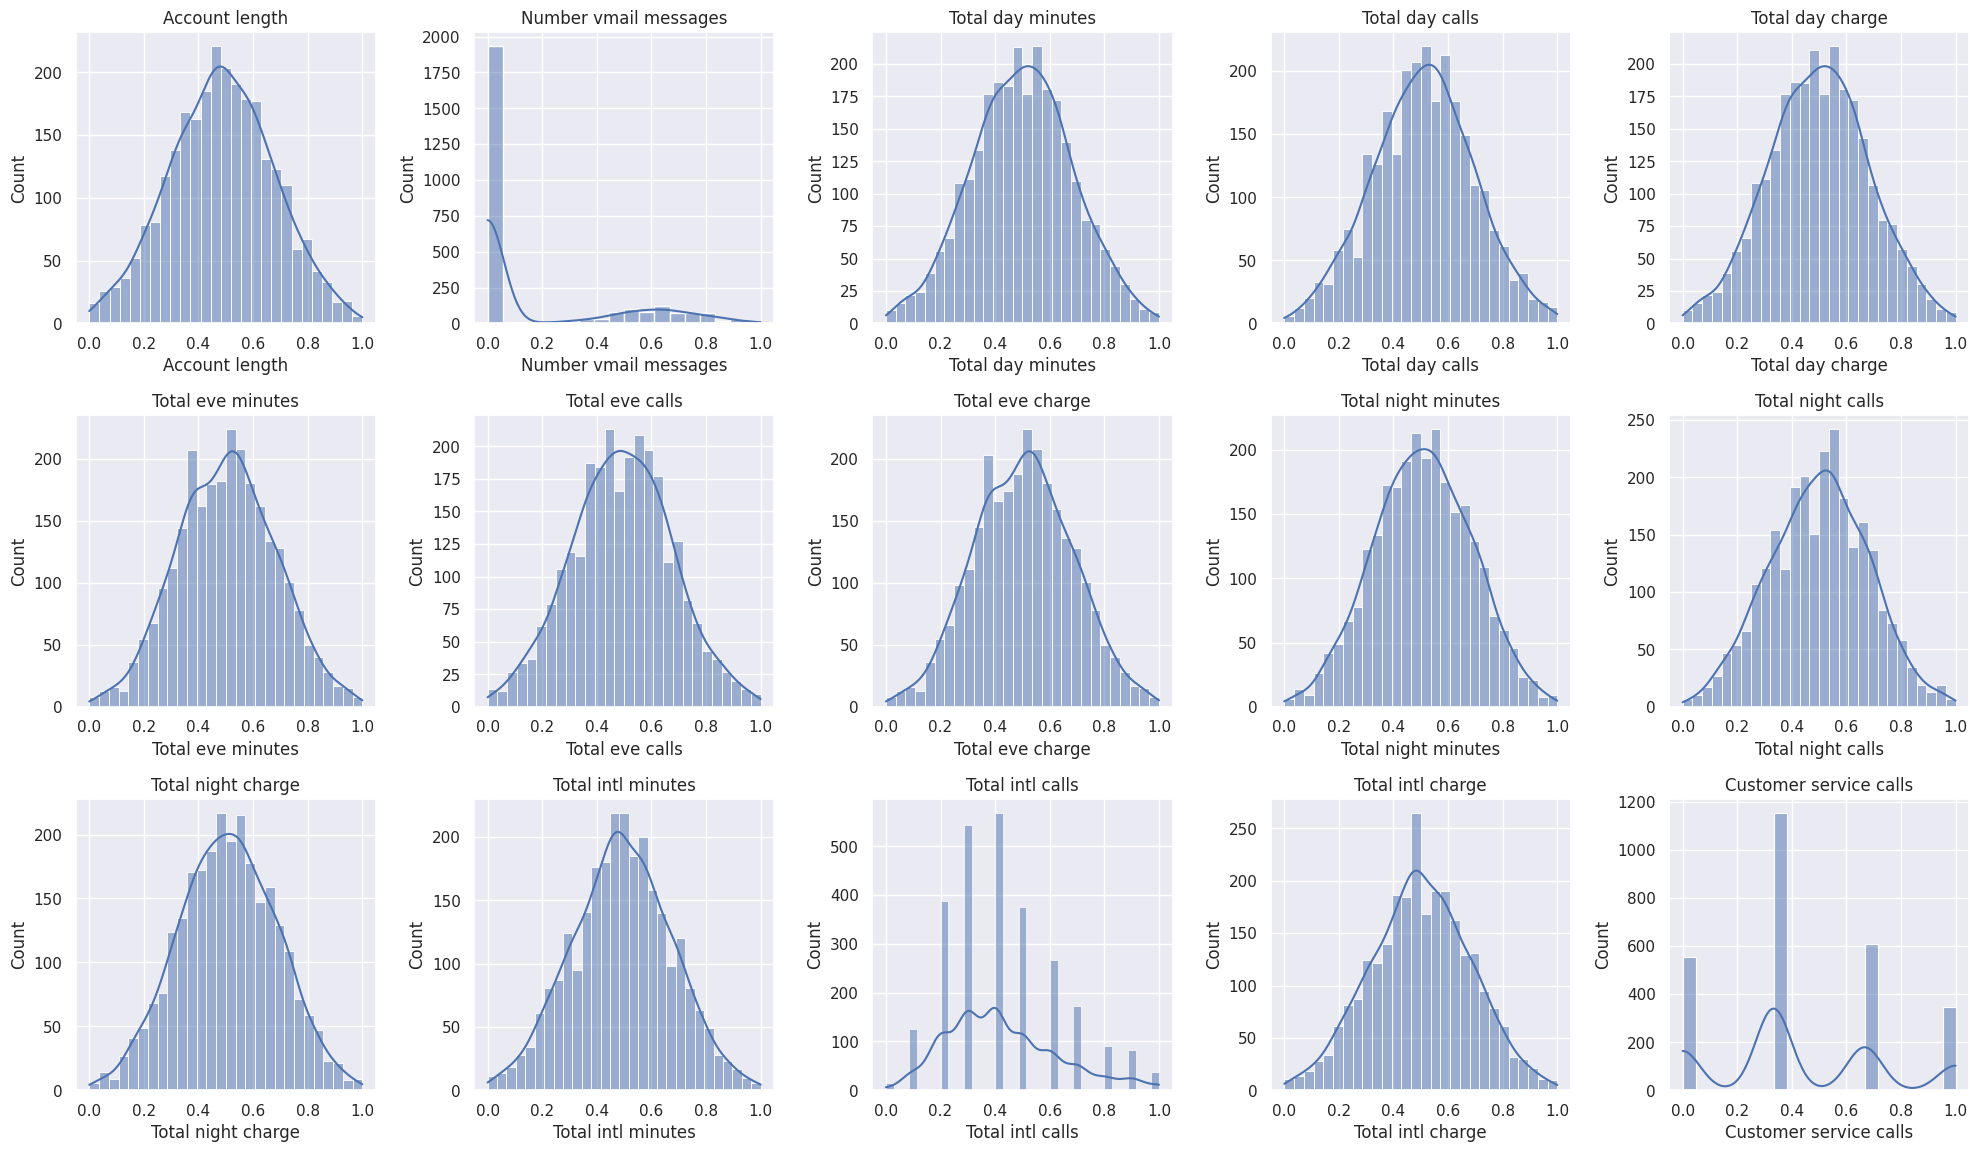

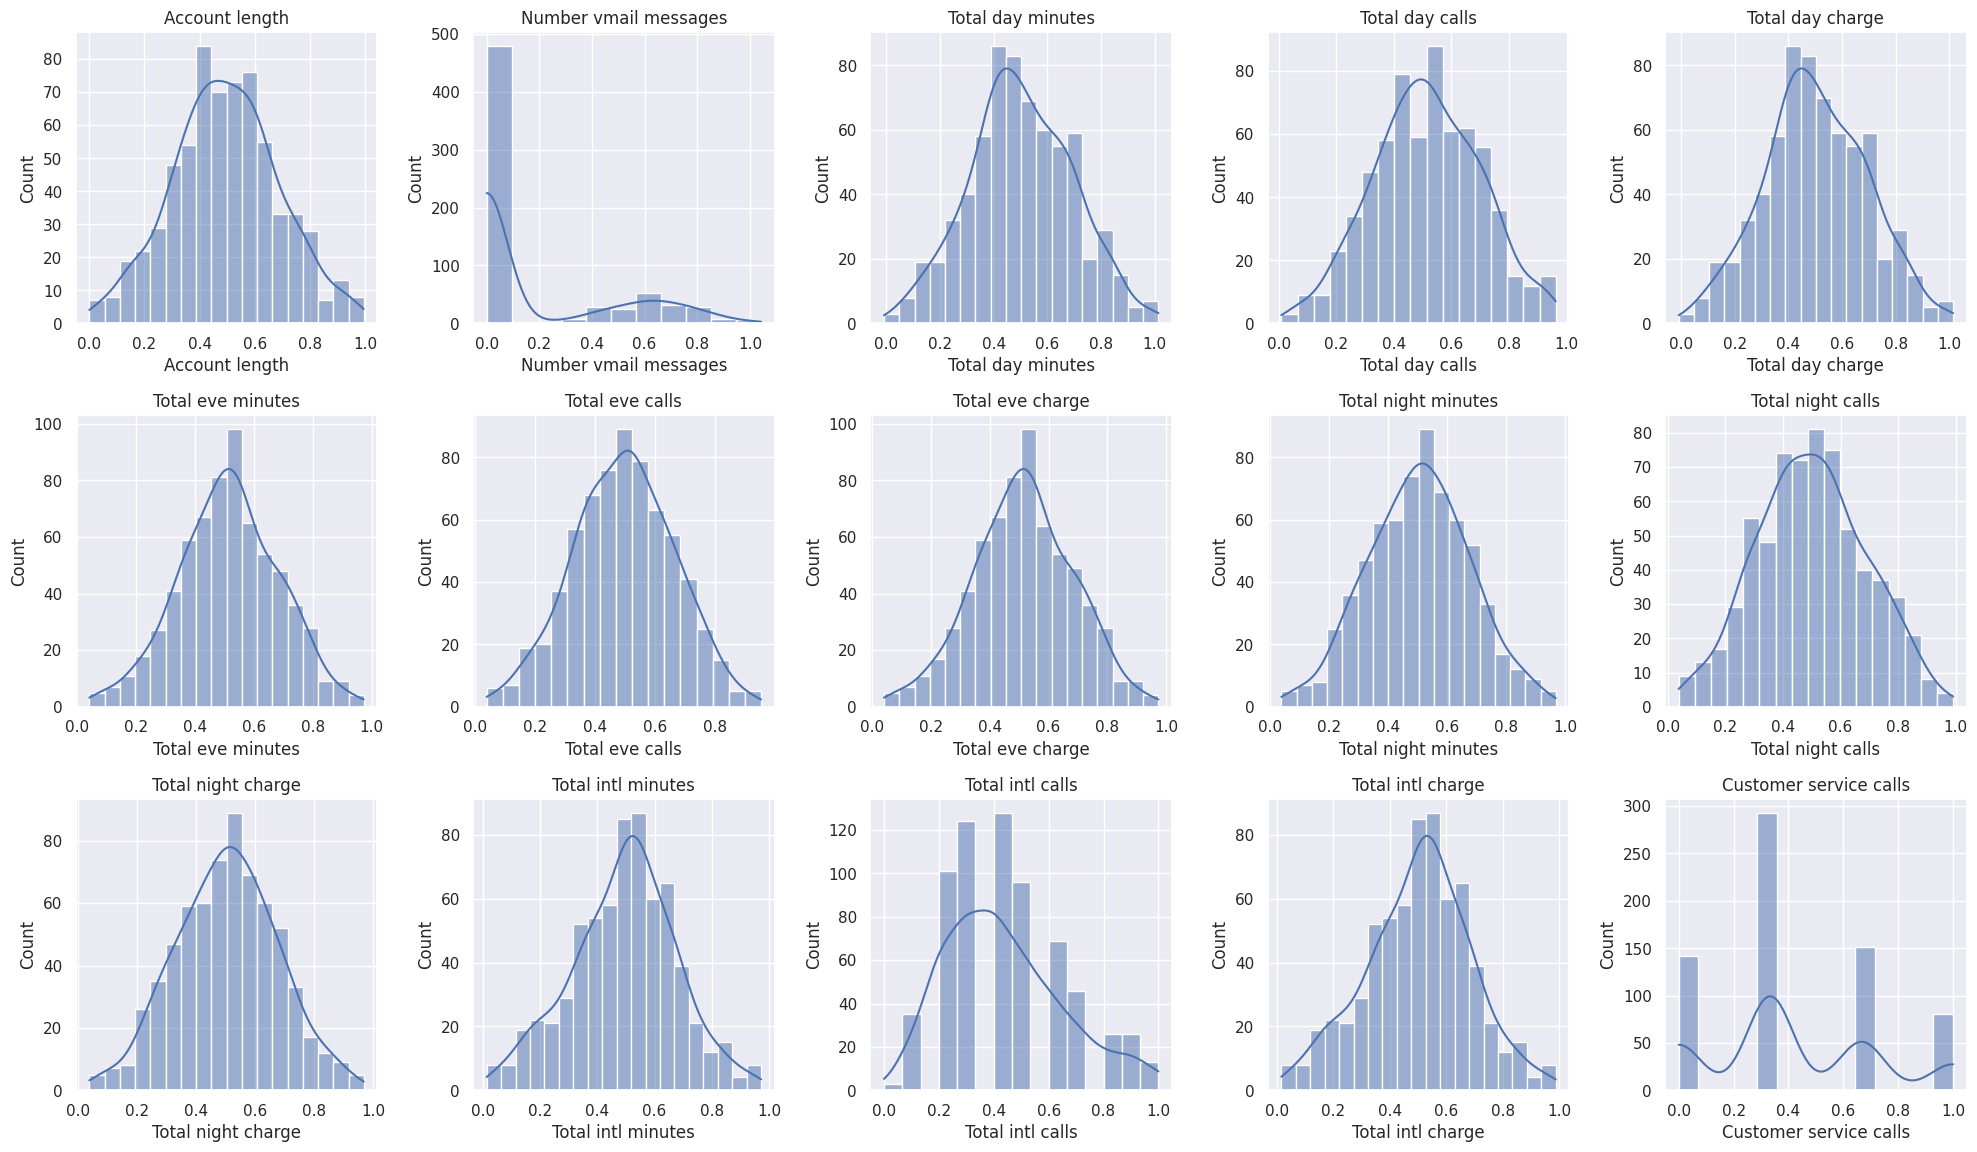

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical columns in the dataset
numerical_columns = [
    'Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls',
    'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge',
    'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes',
    'Total intl calls', 'Total intl charge', 'Customer service calls'
]

# Plot histograms for the numerical columns after scaling
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 5, i)
    sns.histplot(scaled_df_80[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 5, i)
    sns.histplot(scaled_df_20[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

Feature selection

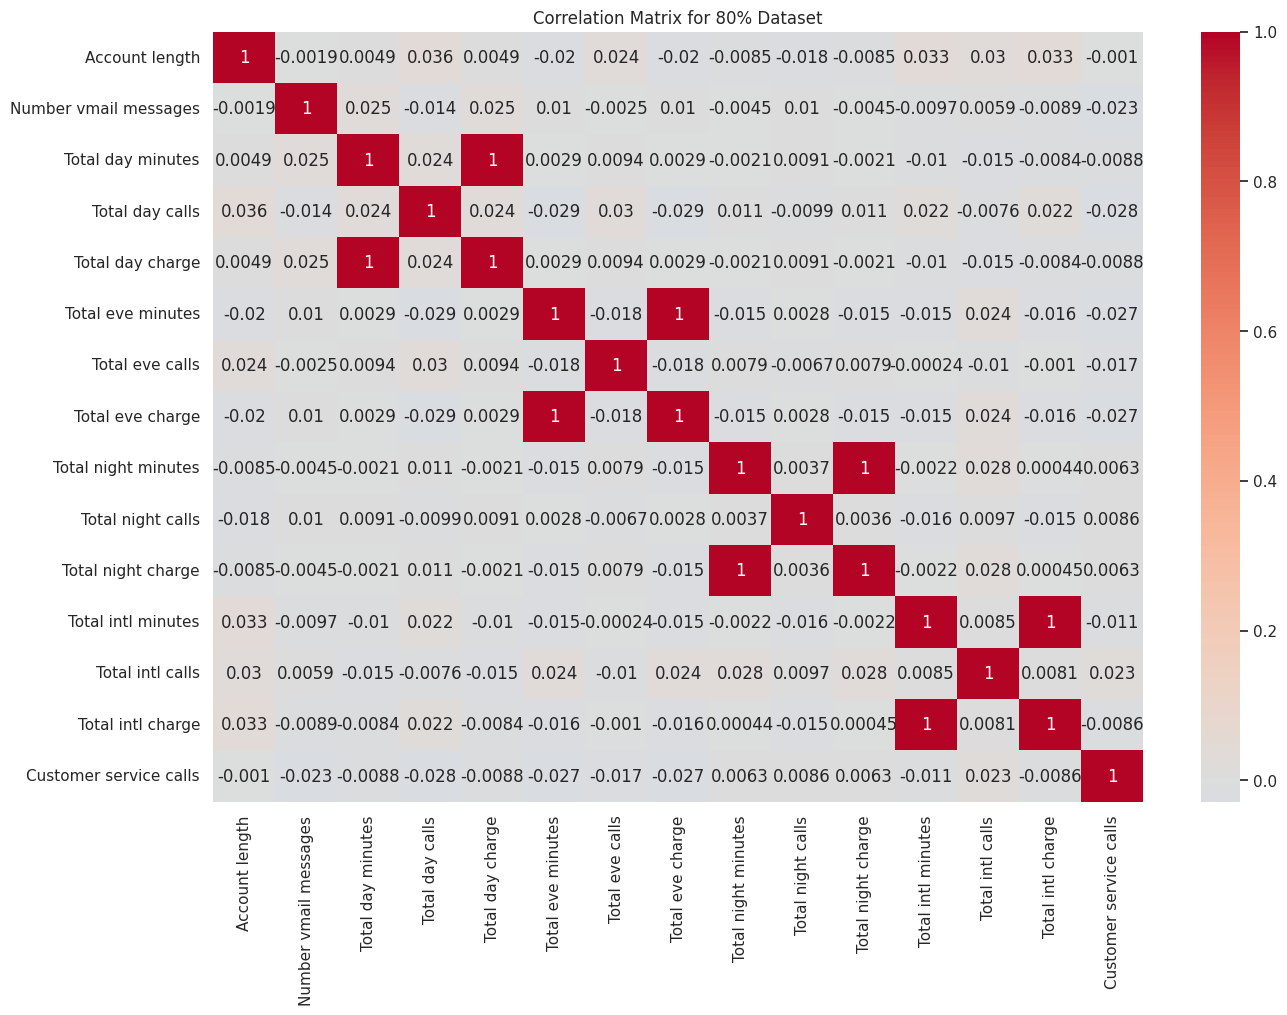

In [19]:
# Select only numerical columns for correlation matrix
numerical_columns = [
    'Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls',
    'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge',
    'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes',
    'Total intl calls', 'Total intl charge', 'Customer service calls'
]

# Compute the correlation matrix for the 80% dataset
correlation_matrix = scaled_df_80[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for 80% Dataset')
plt.show()

In [20]:
# Remove one feature from each highly correlated pair
features_to_remove = ['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']

# Create a new dataframe with the selected features removed
reduced_df_80 = scaled_df_80.drop(columns=features_to_remove,axis=1)

# Display the first few rows of the reduced dataframe
reduced_df_80.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,0.32,0.622549,0.068627,0.0,1.0,0.531915,0.798736,0.600000,0.492369,0.481132,0.668386,0.413462,0.471831,0.3,0.333333,0.0
1,0.70,0.519608,0.068627,0.0,1.0,0.553191,0.435195,0.723810,0.485465,0.518868,0.704127,0.528846,0.732394,0.3,0.333333,0.0
2,0.62,0.666667,0.068627,0.0,0.0,0.000000,0.722515,0.638095,0.215480,0.584906,0.365881,0.538462,0.626761,0.5,0.000000,0.0
3,0.70,0.406863,0.000000,1.0,0.0,0.000000,0.919213,0.228571,0.000000,0.377358,0.492262,0.394231,0.232394,0.7,0.666667,0.0
4,0.72,0.362745,0.068627,1.0,0.0,0.000000,0.453109,0.628571,0.313953,0.698113,0.455416,0.701923,0.478873,0.3,1.000000,0.0


In [21]:
# Remove one feature from each highly correlated pair
features_to_remove = ['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']

# Create a new dataframe with the selected features removed
reduced_df_20 = scaled_df_20.drop(columns=features_to_remove)

# Display the first few rows of the reduced dataframe
reduced_df_20.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,0.36,0.568627,0.000000,0.0,0.0,0.0,0.515630,0.476190,0.515262,0.301887,0.561901,0.403846,0.380282,0.4,0.333333,0.0
1,0.30,0.313725,0.068627,0.0,0.0,0.0,0.321040,0.857143,0.605378,0.330189,0.536109,0.605769,0.661972,0.6,0.333333,1.0
2,0.68,0.784314,0.068627,0.0,0.0,0.0,0.493853,0.190476,0.929869,0.462264,0.358511,0.769231,0.147887,0.9,0.333333,1.0
3,0.80,0.539216,0.068627,0.0,0.0,0.0,0.255357,0.533333,0.273983,0.509434,0.465365,0.548077,0.309859,0.6,0.666667,0.0
4,0.22,0.235294,1.000000,0.0,0.0,0.0,0.286617,0.666667,0.556686,0.575472,0.425203,0.403846,0.549296,0.1,0.333333,0.0


##modeling

##The Logistic Regression model

In [22]:


# Define the feature matrix and target vector for reduced_df_80
X_reduced = reduced_df_80.drop(columns=['Churn'])
y_reduced = reduced_df_80['Churn']

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation for the reduced dataset
grid_search_reduced = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the reduced data
grid_search_reduced.fit(X_reduced, y_reduced)

# Get the best parameters and the best score for the reduced dataset
best_params_reduced = grid_search_reduced.best_params_
best_score_reduced = grid_search_reduced.best_score_

best_params_reduced, best_score_reduced

({'C': 1, 'solver': 'lbfgs'}, 0.8608428020321689)

The Logistic Regression model was optimized using hyperparameter tuning and 5-fold cross-validation on the reduced_df_80 dataset. The best parameters identified were a regularization parameter ( C = 1 ) and the liblinear solver. This configuration achieved an average cross-validation accuracy of approximately 86.35%, indicating a well-performing model for predicting customer churn in this reduced dataset.

##The K-Nearest Neighbors (KNN) model

In [23]:


# Define the feature matrix and target vector for reduced_df_80
X_reduced = reduced_df_80.drop(columns=['Churn'])
y_reduced = reduced_df_80['Churn']

# Define the parameter grid for hyperparameter tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Initialize GridSearchCV with 5-fold cross-validation for the reduced dataset
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy')

# Fit the model to the reduced data
grid_search_knn.fit(X_reduced, y_reduced)

# Get the best parameters and the best score for the reduced dataset
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

best_params_knn, best_score_knn

({'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'},
 0.8687199162397847)

##Support Vector Machine (SVM)

In [24]:


# Define the feature matrix and target vector for reduced_df_80
X_reduced = reduced_df_80.drop(columns=['Churn'])
y_reduced = reduced_df_80['Churn']

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Initialize the SVM model
svm = SVC()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_reduced, y_reduced)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the best SVM model on the entire dataset
best_svm = grid_search.best_estimator_
best_svm.fit(X_reduced, y_reduced)

# Print the best parameters and best score
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.8954


##decision tree

In [25]:


# Define the feature matrix and target vector for reduced_df_80
X_reduced = reduced_df_80.drop(columns=['Churn'])
y_reduced = reduced_df_80['Churn']

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 1, 5, 4, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree model
dt = DecisionTreeClassifier()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_reduced, y_reduced)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the best Decision Tree model on the entire dataset
best_dt = grid_search.best_estimator_
best_dt.fit(X_reduced, y_reduced)

# Print the best parameters and best score
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Cross-Validation Accuracy: 0.9107


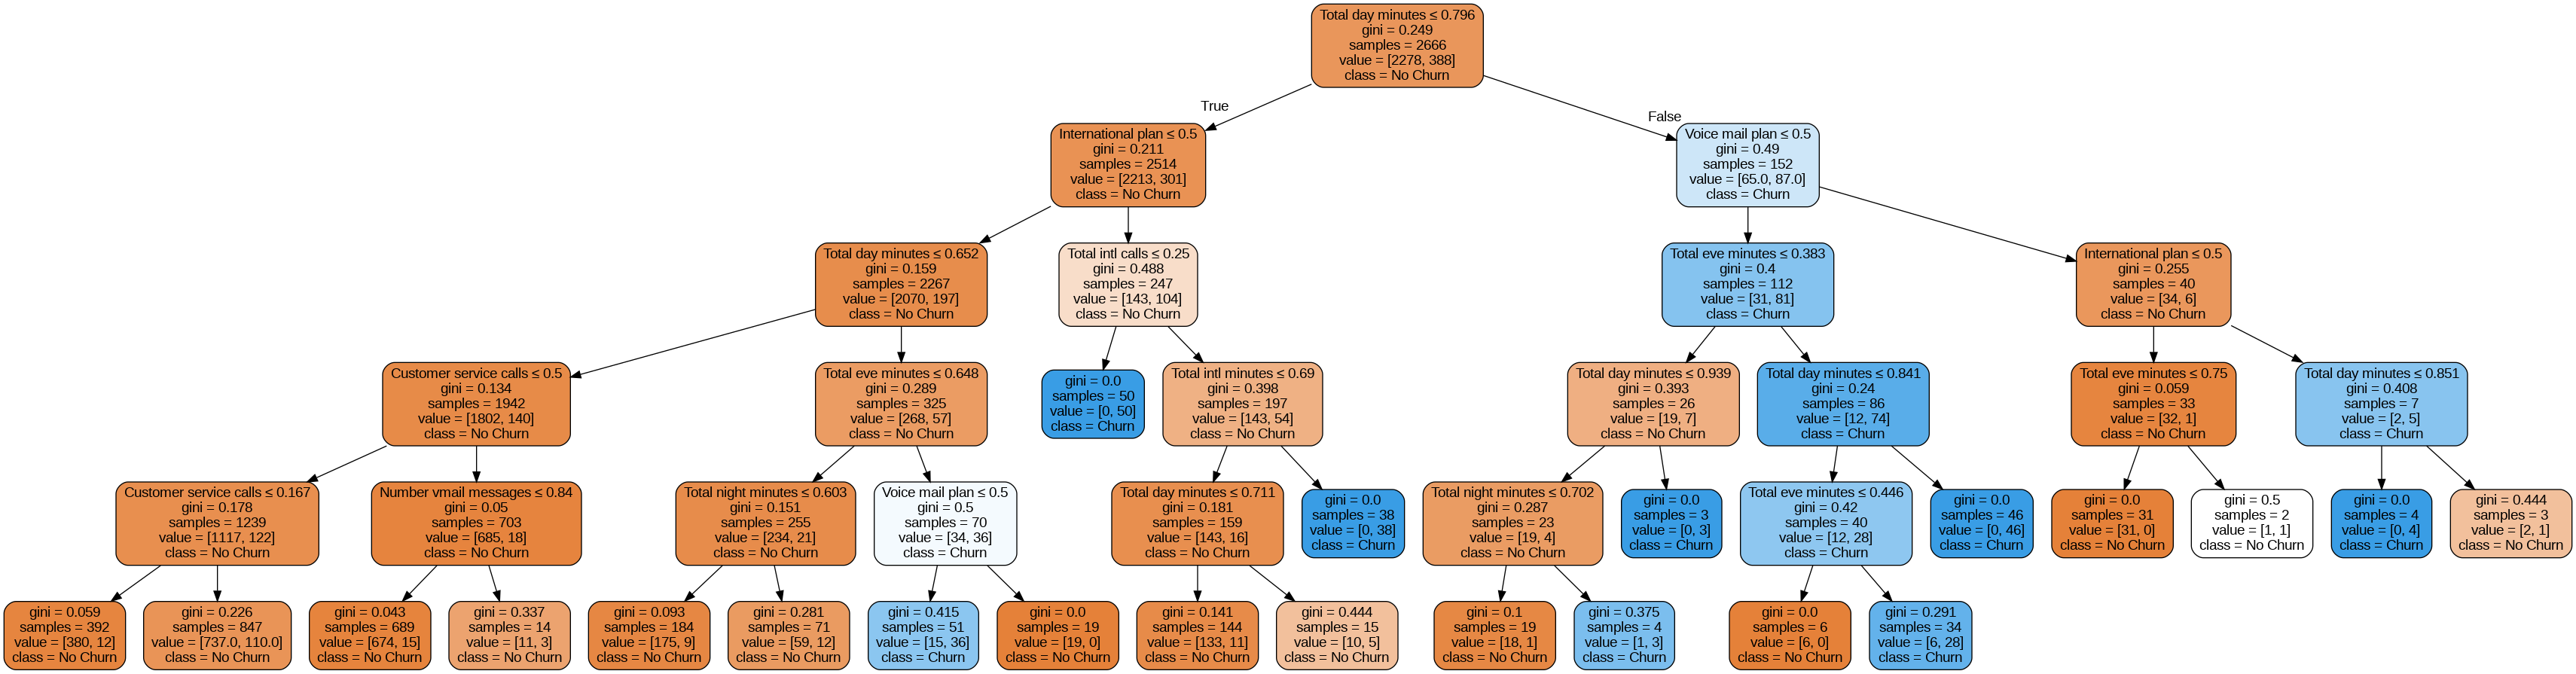

In [26]:
from sklearn.tree import export_graphviz
from io import StringIO
import graphviz
from IPython.display import Image

# Create a StringIO object to hold the dot data
dot_data = StringIO()

# Export the tree to dot format
export_graphviz(best_dt, out_file=dot_data, filled=True, feature_names=X_reduced.columns, class_names=['No Churn', 'Churn'], rounded=True, special_characters=True)

# Create a graph from the dot data
graph = graphviz.Source(dot_data.getvalue())

# Display the tree image
# Change format to 'png' to generate a PNG file
graph.render("decision_tree", format='png')
Image(filename="decision_tree.png")

##random forest

In [27]:

# Define the feature matrix and target vector for reduced_df_80
X_reduced = reduced_df_80.drop(columns=['Churn'])
y_reduced = reduced_df_80['Churn']

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [2*n+1 for n in range(20)],  # Number of trees in the forest
    'max_depth': [2*n+1 for n in range(10)],  # Maximum depth of the tree
    'max_features': ["auto", "sqrt", "log2"]  # Number of features to consider for the best split
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(X_reduced, y_reduced)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the best model on the entire training set
best_rf = grid_search.best_estimator_
best_rf.fit(X_reduced, y_reduced)

# Print the best parameters and the best score
print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


1000 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

Best Parameters: {'max_depth': 13, 'max_features': 'sqrt', 'n_estimators': 39}
Best Cross-Validation Score: 0.9129758065082811


##AdaBoost

In [28]:


# Define the feature matrix and target vector for reduced_df_80
X_reduced = reduced_df_80.drop(columns=['Churn'])
y_reduced = reduced_df_80['Churn']

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.1*(n+1) for n in range(10)],  # Contribution of each weak classifier
    'n_estimators': [2*n+1 for n in range(10)],  # Number of weak classifiers to use in the ensemble
    'algorithm': ['SAMME', 'SAMME.R']  # Type of boosting algorithm to use
}

# Initialize the AdaBoost classifier
ada = AdaBoostClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(X_reduced, y_reduced)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the best model on the entire training set
best_ada = grid_search.best_estimator_
best_ada.fit(X_reduced, y_reduced)

# Print the best parameters and the best score
print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 13}
Best Cross-Validation Score: 0.8724736668282846


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



##XGboost

In [29]:


# Define the feature matrix and target vector for reduced_df_80
X_reduced = reduced_df_80.drop(columns=['Churn'])
y_reduced = reduced_df_80['Churn']

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Step size shrinkage used to prevent overfitting
    'n_estimators': [10, 20, 50],  # Number of boosting rounds
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.8, 1.0]  # Subsample ratio of columns when constructing each tree
}

# Initialize the XGBoost classifier
xgb = XGBClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(X_reduced, y_reduced)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the best model on the entire training set
best_xgb = grid_search.best_estimator_
best_xgb.fit(X_reduced, y_reduced)

# Print the best parameters and the best score
print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}
Best Cross-Validation Score: 0.9246052659316568


##GBM

In [30]:


# Define the feature matrix and target vector for reduced_df_80
X_reduced = reduced_df_80.drop(columns=['Churn'])
y_reduced = reduced_df_80['Churn']

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Step size shrinkage used to prevent overfitting
    'n_estimators': [10, 20, 50],  # Number of boosting rounds
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instances
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider for the best split
}

# Initialize the Gradient Boosting classifier
gbm = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(X_reduced, y_reduced)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the best model on the entire training set
best_gbm = grid_search.best_estimator_
best_gbm.fit(X_reduced, y_reduced)

# Print the best parameters and the best score
print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ut

Best Parameters: {'learning_rate': 0.3, 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 50, 'subsample': 1.0}
Best Cross-Validation Score: 0.9152244028922573


##LGBM

In [55]:


# Define the feature matrix and target vector for reduced_df_80
X_reduced = reduced_df_80.drop(columns=['Churn'])
y_reduced = reduced_df_80['Churn']

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Step size shrinkage used to prevent overfitting
    'n_estimators': [10, 20, 50],  # Number of boosting rounds
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'num_leaves': [31, 50, 100],  # Number of leaves in one tree
    'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.8, 1.0]  # Subsample ratio of columns when constructing each tree
}

# Initialize the LightGBM classifier
lgbm = lgb.LGBMClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(X_reduced, y_reduced)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the best model on the entire training set
best_lgbm = grid_search.best_estimator_
best_lgbm.fit(X_reduced, y_reduced)

# Print the best parameters and the best score
print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 388, number of negative: 2278
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000802 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1490
[LightGBM] [Info] Number of data points in the train set: 2666, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.145536 -> initscore=-1.770048
[LightGBM] [Info] Start training from score -1.770048
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

##Bagging classifier model

In [32]:

# Define the feature matrix and target vector for reduced_df_80
X_reduced = reduced_df_80.drop(columns=['Churn'])
y_reduced = reduced_df_80['Churn']


# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of base estimators in the ensemble
    'max_samples': [0.5, 0.7, 1.0],  # The number of samples to draw from X to train each base estimator
    'max_features': [0.5, 0.7, 1.0],  # The number of features to draw from X to train each base estimator
    'bootstrap': [True, False],  # Whether samples are drawn with replacement
    'bootstrap_features': [True, False]  # Whether features are drawn with replacement
}

# Initialize the Bagging classifier with a DecisionTreeClassifier as the base estimator
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(X_reduced, y_reduced)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the best model on the entire training set
best_bagging = grid_search.best_estimator_
best_bagging.fit(X_reduced, y_reduced)

# Print the best parameters and the best score
print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'bootstrap': False, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 200}
Best Cross-Validation Score: 0.917478620767193


# Evalution

##Logistic Regression classifie

In [46]:

#Define the feature matrix and target vector for the training set
X_reduced_train = reduced_df_80.drop(columns=['Churn'])
y_reduced_train = reduced_df_80['Churn']

# Define the feature matrix and target vector for the testing set
X_reduced_test = reduced_df_20.drop(columns=['Churn'])
y_reduced_test = reduced_df_20['Churn']

# Create the Logistic Regression classifier with the best parameters
logreg_model = LogisticRegression(C=1, solver='lbfgs', max_iter=1000)

# Fit the model to the training data
logreg_model.fit(X_reduced_train, y_reduced_train)

# Predict on the test data
y_pred_logreg = logreg_model.predict(X_reduced_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_reduced_test, y_pred_logreg)
report_logreg = classification_report(y_reduced_test, y_pred_logreg)

# Print the accuracy and classification report
print("Accuracy:", accuracy_logreg)
print("Classification Report:\n", report_logreg)

Accuracy: 0.8515742128935532
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92       572
         1.0       0.36      0.05      0.09        95

    accuracy                           0.85       667
   macro avg       0.61      0.52      0.51       667
weighted avg       0.79      0.85      0.80       667



##the KNN classifier

In [43]:
# Define the feature matrix and target vector for reduced_df_80
X_reduced_train = reduced_df_80.drop(columns=['Churn'])
y_reduced_train = reduced_df_80['Churn']
# Define the feature matrix and target vector for reduced_df_80
X_reduced_test = reduced_df_20.drop(columns=['Churn'])
y_reduced_test = reduced_df_20['Churn']
# Best parameters found
best_params = {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
# Initialize the KNN classifier with the best parameters
knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], metric=best_params['metric'], weights=best_params['weights'])
# Fit the model to the training data
knn_model = knn.fit(X_reduced_train,y_reduced_train)

# Predict on the test data
y_pred_knn = knn_model.predict(X_reduced_test)

# Evaluate the model
accuracy = accuracy_score(y_reduced_test, y_pred_knn)
report = classification_report(y_reduced_test, y_pred_knn)

# Print the accuracy and classification report
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.863568215892054
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.98      0.93       572
         1.0       0.58      0.15      0.24        95

    accuracy                           0.86       667
   macro avg       0.73      0.56      0.58       667
weighted avg       0.83      0.86      0.83       667



##Support Vector Machine (SVM)

In [47]:
# Define the feature matrix and target vector for the training set
X_reduced_train = reduced_df_80.drop(columns=['Churn'])
y_reduced_train = reduced_df_80['Churn']

# Define the feature matrix and target vector for the testing set
X_reduced_test = reduced_df_20.drop(columns=['Churn'])
y_reduced_test = reduced_df_20['Churn']

# Create the SVM classifier with the best parameters
svm_model = SVC(C=10, gamma='scale', kernel='rbf')

# Fit the model to the training data
svm_model.fit(X_reduced_train, y_reduced_train)

# Predict on the test data
y_pred_svm = svm_model.predict(X_reduced_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_reduced_test, y_pred_svm)
report_svm = classification_report(y_reduced_test, y_pred_svm)

# Print the accuracy and classification report
print("Accuracy:", accuracy_svm)
print("Classification Report:\n", report_svm)

Accuracy: 0.8980509745127436
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.94       572
         1.0       0.76      0.41      0.53        95

    accuracy                           0.90       667
   macro avg       0.84      0.69      0.74       667
weighted avg       0.89      0.90      0.88       667



##DecisionTree

In [67]:
# Define the feature matrix and target vector for the training set
X_reduced_train = reduced_df_80.drop(columns=['Churn'])
y_reduced_train = reduced_df_80['Churn']

# Define the feature matrix and target vector for the testing set
X_reduced_test = reduced_df_20.drop(columns=['Churn'])
y_reduced_test = reduced_df_20['Churn']

# Create the Decision Tree classifier with the best parameters
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_leaf=2,
    min_samples_split=5
)

# Fit the model to the training data
dt_model.fit(X_reduced_train, y_reduced_train)

# Predict on the test data
y_pred_dt = dt_model.predict(X_reduced_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_reduced_test, y_pred_dt)
report_dt = classification_report(y_reduced_test, y_pred_dt)

# Print the accuracy and classification report
print("Accuracy:", accuracy_dt)
print("Classification Report:\n", report_dt)

Accuracy: 0.9175412293853074
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       572
         1.0       0.82      0.54      0.65        95

    accuracy                           0.92       667
   macro avg       0.87      0.76      0.80       667
weighted avg       0.91      0.92      0.91       667



##RandomForest

In [50]:


# Define the feature matrix and target vector for the training set
X_reduced_train = reduced_df_80.drop(columns=['Churn'])
y_reduced_train = reduced_df_80['Churn']

# Define the feature matrix and target vector for the testing set
X_reduced_test = reduced_df_20.drop(columns=['Churn'])
y_reduced_test = reduced_df_20['Churn']

# Create the Random Forest classifier with the best parameters
rf_model = RandomForestClassifier(
    max_depth=13,
    max_features='sqrt',
    n_estimators=39
)

# Fit the model to the training data
rf_model.fit(X_reduced_train, y_reduced_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_reduced_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_reduced_test, y_pred_rf)
report_rf = classification_report(y_reduced_test, y_pred_rf)

# Print the accuracy and classification report
print("Accuracy:", accuracy_rf)
print("Classification Report:\n", report_rf)

Accuracy: 0.9115442278860569
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       572
         1.0       0.95      0.40      0.56        95

    accuracy                           0.91       667
   macro avg       0.93      0.70      0.76       667
weighted avg       0.91      0.91      0.90       667



##AdaBoost

In [51]:
# Define the feature matrix and target vector for the training set
X_reduced_train = reduced_df_80.drop(columns=['Churn'])
y_reduced_train = reduced_df_80['Churn']

# Define the feature matrix and target vector for the testing set
X_reduced_test = reduced_df_20.drop(columns=['Churn'])
y_reduced_test = reduced_df_20['Churn']

# Create the AdaBoost classifier with the best parameters
ada_model = AdaBoostClassifier(
    algorithm='SAMME.R',
    learning_rate=1.0,
    n_estimators=13
)

# Fit the model to the training data
ada_model.fit(X_reduced_train, y_reduced_train)

# Predict on the test data
y_pred_ada = ada_model.predict(X_reduced_test)

# Evaluate the model
accuracy_ada = accuracy_score(y_reduced_test, y_pred_ada)
report_ada = classification_report(y_reduced_test, y_pred_ada)

# Print the accuracy and classification report
print("Accuracy:", accuracy_ada)
print("Classification Report:\n", report_ada)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Accuracy: 0.8770614692653673
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       572
         1.0       0.69      0.25      0.37        95

    accuracy                           0.88       667
   macro avg       0.79      0.62      0.65       667
weighted avg       0.86      0.88      0.85       667



##XGBoost

In [90]:

# Define the feature matrix and target vector for the training set
X_reduced_train = reduced_df_80.drop(columns=['Churn'])
y_reduced_train = reduced_df_80['Churn']

# Define the feature matrix and target vector for the testing set
X_reduced_test = reduced_df_20.drop(columns=['Churn'])
y_reduced_test = reduced_df_20['Churn']

# Create the XGBoost classifier with the best parameters
xgb_model = xgb.XGBClassifier(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=50,
    subsample=1.0
)

# Fit the model to the training data
xgb_model.fit(X_reduced_train, y_reduced_train)

# Predict on the test data
y_pred_xgb = xgb_model.predict(X_reduced_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_reduced_test, y_pred_xgb)
report_xgb = classification_report(y_reduced_test, y_pred_xgb)

# Print the accuracy and classification report
print("Accuracy:", accuracy_xgb)
print("Classification Report:\n", report_xgb)

Accuracy: 0.9190404797601199
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       572
         1.0       0.89      0.49      0.64        95

    accuracy                           0.92       667
   macro avg       0.90      0.74      0.79       667
weighted avg       0.92      0.92      0.91       667



##Gradient Boosting Machine (GBM)

In [56]:

# Define the feature matrix and target vector for the training set
X_reduced_train = reduced_df_80.drop(columns=['Churn'])
y_reduced_train = reduced_df_80['Churn']

# Define the feature matrix and target vector for the testing set
X_reduced_test = reduced_df_20.drop(columns=['Churn'])
y_reduced_test = reduced_df_20['Churn']

# Create the Gradient Boosting classifier with the best parameters
gbm_model = GradientBoostingClassifier(
    learning_rate=0.3,
    max_depth=7,
    max_features='sqrt',
    n_estimators=50,
    subsample=1.0
)

# Fit the model to the training data
gbm_model.fit(X_reduced_train, y_reduced_train)

# Predict on the test data
y_pred_gbm = gbm_model.predict(X_reduced_test)

# Evaluate the model
accuracy_gbm = accuracy_score(y_reduced_test, y_pred_gbm)
report_gbm = classification_report(y_reduced_test, y_pred_gbm)

# Print the accuracy and classification report
print("Accuracy:", accuracy_gbm)
print("Classification Report:\n", report_gbm)

Accuracy: 0.9115442278860569
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       572
         1.0       0.85      0.46      0.60        95

    accuracy                           0.91       667
   macro avg       0.88      0.72      0.77       667
weighted avg       0.91      0.91      0.90       667



##LightGBM (LGBM)

In [57]:
# Define the feature matrix and target vector for the training set
# Define the feature matrix and target vector for the training set
X_reduced_train = reduced_df_80.drop(columns=['Churn'])
y_reduced_train = reduced_df_80['Churn']

# Define the feature matrix and target vector for the testing set
X_reduced_test = reduced_df_20.drop(columns=['Churn'])
y_reduced_test = reduced_df_20['Churn']

# Create the LightGBM classifier with the best parameters
lgbm_model = lgb.LGBMClassifier(
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=7,
    n_estimators=50,
    num_leaves=50,
    subsample=0.6
)

# Fit the model to the training data
lgbm_model.fit(X_reduced_train, y_reduced_train)

# Predict on the test data
y_pred_lgbm = lgbm_model.predict(X_reduced_test)

# Evaluate the model
accuracy_lgbm = accuracy_score(y_reduced_test, y_pred_lgbm)
report_lgbm = classification_report(y_reduced_test, y_pred_lgbm)

# Print the accuracy and classification report
print("Accuracy:", accuracy_lgbm)
print("Classification Report:\n", report_lgbm)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 388, number of negative: 2278
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1490
[LightGBM] [Info] Number of data points in the train set: 2666, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.145536 -> initscore=-1.770048
[LightGBM] [Info] Start training from score -1.770048
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

##the Bagging model


In [64]:

# Define the feature matrix and target vector for the training set
X_reduced_train = reduced_df_80.drop(columns=['Churn'])
y_reduced_train = reduced_df_80['Churn']

# Define the feature matrix and target vector for the testing set
X_reduced_test = reduced_df_20.drop(columns=['Churn'])
y_reduced_test = reduced_df_20['Churn']

# Create the Bagging classifier with the best parameters
bagging_model = BaggingClassifier(
    bootstrap=False,
    bootstrap_features=False,
    max_features=1.0,
    max_samples=0.5,
    n_estimators=200
)

# Fit the model to the training data
bagging_model.fit(X_reduced_train, y_reduced_train)

# Predict on the test data
y_pred_bagging = bagging_model.predict(X_reduced_test)

# Evaluate the model
accuracy_bagging = accuracy_score(y_reduced_test, y_pred_bagging)
report_bagging = classification_report(y_reduced_test, y_pred_bagging)

# Print the accuracy and classification report
print("Accuracy:", accuracy_bagging)
print("Classification Report:\n", report_bagging)

Accuracy: 0.9220389805097451
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.99      0.96       572
         1.0       0.92      0.49      0.64        95

    accuracy                           0.92       667
   macro avg       0.92      0.74      0.80       667
weighted avg       0.92      0.92      0.91       667



## Model performance metrics

In [92]:


# Suppress warnings
warnings.filterwarnings("ignore")

# Load or prepare your data
X_train = reduced_df_80.drop(columns=['Churn'])
y_train = reduced_df_80['Churn']
X_test = reduced_df_20.drop(columns=['Churn'])
y_test = reduced_df_20['Churn']

# Define Models, including Gradient Boosting
models = {
    "Bagging Classifier": BaggingClassifier(
        bootstrap=False, bootstrap_features=False,
        max_features=1.0, max_samples=0.5, n_estimators=200
    ),
    "KNN Classifier": KNeighborsClassifier(
        n_neighbors=7, metric='manhattan', weights='distance'
    ),
    "Logistic Regression": LogisticRegression(
        C=1, solver='lbfgs', max_iter=1000
    ),
    "SVM (RBF Kernel)": SVC(
        C=10, gamma='scale', kernel='rbf', probability=True
    ),
    "Decision Tree": DecisionTreeClassifier(
        criterion='gini', max_depth=5, min_samples_leaf=2, min_samples_split=5
    ),
    "Random Forest": RandomForestClassifier(
        max_depth=13, max_features='sqrt', n_estimators=39
    ),
    "AdaBoost": AdaBoostClassifier(
        algorithm='SAMME.R', learning_rate=1.0, n_estimators=13
    ),
    "XGBoost": xgb.XGBClassifier(
        colsample_bytree=1.0, learning_rate=0.1, max_depth=5,
        n_estimators=50, subsample=1.0
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        learning_rate=0.3, max_depth=7, max_features='sqrt',
        n_estimators=50, subsample=1.0
    ),
    "LightGBM": lgb.LGBMClassifier(
        colsample_bytree=0.8, learning_rate=0.1, max_depth=7,
        n_estimators=50, num_leaves=50, subsample=0.6
    )
}

# List to store model performance
model_results = []

# Evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate Metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan
    kappa = cohen_kappa_score(y_test, y_pred)

    # Append results
    model_results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "f1-score": f1,
        "ROC_AUC": roc_auc
    })

# Create a DataFrame
results_df = pd.DataFrame(model_results)

# Round the metrics for better presentation
results_df = results_df.round(4)

# Display table using Plotly
table = ff.create_table(results_df)
pio.show(table)

# Print classification reports for all models
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 388, number of negative: 2278
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1490
[LightGBM] [Info] Number of data points in the train set: 2666, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.145536 -> initscore=-1.770048
[LightGBM] [Info] Start training from score -1.770048
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga


Classification Report for Bagging Classifier:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96       572
         1.0       0.94      0.49      0.65        95

    accuracy                           0.92       667
   macro avg       0.93      0.74      0.80       667
weighted avg       0.92      0.92      0.91       667


Classification Report for KNN Classifier:
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.93       572
         1.0       0.58      0.15      0.24        95

    accuracy                           0.86       667
   macro avg       0.73      0.56      0.58       667
weighted avg       0.83      0.86      0.83       667


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92       572
         1.0       0.36      0.05      0.09        95

    accuracy                           0.85 

Key Observations:
- Bagging Classifier has the highest Accuracy (0.922) and high Precision (0.9216) but a moderate Recall (0.4947).
- Decision Tree achieves a high Accuracy (0.9175) and the highest Recall (0.5368), indicating it recovers more true positives compared to others.
- XGBoost also performs very well:
 Accuracy = 0.919,
 Recall = 0.4947,
 Precision = 0.8868,
 f1-score = 0.6351,
 ROC_AUC = 0.8432.
- Gradient Boosting and LightGBM have similar performance:
Accuracy = 0.9145,
ROC_AUC scores are close to XGBoost but slightly lower.
- Final Recommendation:
XGBoost is the best overall model:

Accuracy and ROC_AUC are near the top.
It balances Precision and Recall well, achieving a good f1-score of 0.6351.

##Compare model metrics

In [86]:


def output_tracer(df, metric, color):
    tracer = go.Bar(y=df["Model"],
                    x=df[metric],
                    orientation="h", name=metric,
                    marker=dict(line=dict(width=0.7), color=color)
                   )
    return tracer

def modelmetricsplot(df, title):
    layout = go.Layout(dict(title=title,
                            plot_bgcolor="rgb(243,243,243)",
                            paper_bgcolor="rgb(243,243,243)",
                            xaxis=dict(gridcolor='rgb(255, 255, 255)',
                                       title="Metric",
                                       zerolinewidth=1,
                                       ticklen=5, gridwidth=2),
                            yaxis=dict(gridcolor='rgb(255, 255, 255)',
                                       zerolinewidth=1, ticklen=5, gridwidth=2),
                            margin=dict(l=250),
                            height=780
                           )
                      )

    # Trace for each metric with pastel colors
    trace1 = output_tracer(df, "Accuracy", "#AEC6CF")  # Pastel blue
    trace2 = output_tracer(df, 'Recall', "#FFB3BA")    # Pastel red
    trace3 = output_tracer(df, 'Precision', "#FFB347") # Pastel orange
    trace4 = output_tracer(df, 'f1-score', "#FFDFD3")  # Pastel pink
    trace5 = output_tracer(df, 'ROC_AUC', "#D1C4E9")   # Pastel purple

    # Combine traces into data for the plot
    data = [trace1, trace2, trace3, trace4, trace5]
    fig = go.Figure(data=data, layout=layout)

    # Display the plot
    fig.show()

# Call the plotting function with the DataFrame and title
modelmetricsplot(df=results_df, title="Model Performances over the Training Dataset")



##Confusion matrices for models

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 388, number of negative: 2278
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1490
[LightGBM] [Info] Number of data points in the train set: 2666, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.145536 -> initscore=-1.770048
[LightGBM] [Info] Start training from score -1.770048
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

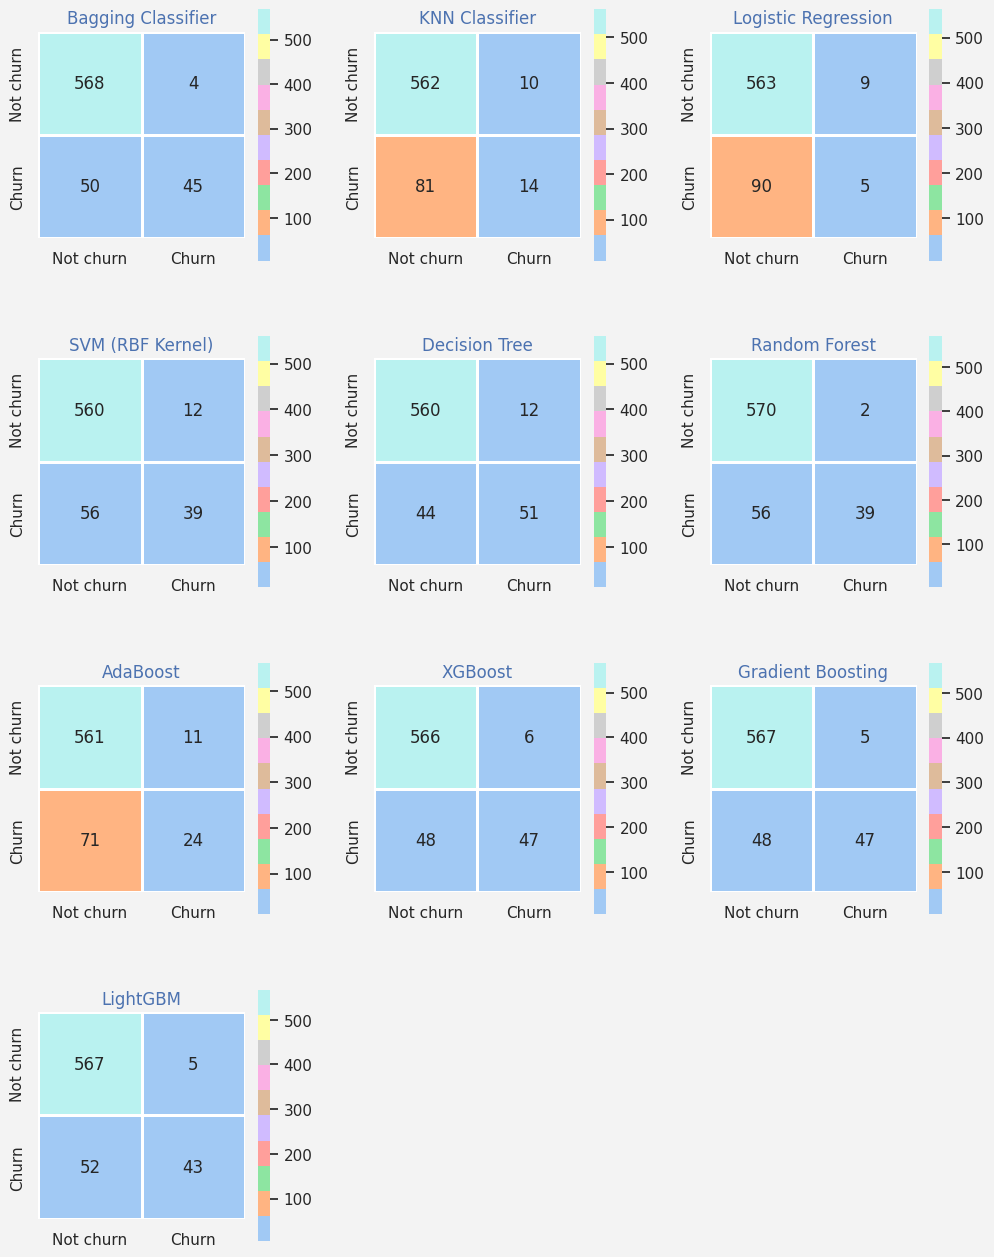

In [94]:

warnings.filterwarnings("ignore")  # Suppress all warnings



# Load or prepare your data
X_train = reduced_df_80.drop(columns=['Churn'])
y_train = reduced_df_80['Churn']
X_test = reduced_df_20.drop(columns=['Churn'])
y_test = reduced_df_20['Churn']

# Define Models
models = {
    "Bagging Classifier": BaggingClassifier(
        bootstrap=False, bootstrap_features=False,
        max_features=1.0, max_samples=0.5, n_estimators=200
    ),
    "KNN Classifier": KNeighborsClassifier(
        n_neighbors=7, metric='manhattan', weights='distance'
    ),
    "Logistic Regression": LogisticRegression(
        C=1, solver='lbfgs', max_iter=1000
    ),
    "SVM (RBF Kernel)": SVC(
        C=10, gamma='scale', kernel='rbf', probability=True
    ),
    "Decision Tree": DecisionTreeClassifier(
        criterion='gini', max_depth=5, min_samples_leaf=2, min_samples_split=5
    ),
    "Random Forest": RandomForestClassifier(
        max_depth=13, max_features='sqrt', n_estimators=39
    ),
    "AdaBoost": AdaBoostClassifier(
        algorithm='SAMME.R', learning_rate=1.0, n_estimators=13
    ),
    "XGBoost": xgb.XGBClassifier(
        colsample_bytree=1.0, learning_rate=0.1, max_depth=5,
        n_estimators=50, subsample=1.0
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        learning_rate=0.3, max_depth=7, max_features='sqrt',
        n_estimators=50, subsample=1.0
    ),
    "LightGBM": lgb.LGBMClassifier(
        colsample_bytree=0.8, learning_rate=0.1, max_depth=7,
        n_estimators=50, num_leaves=50, subsample=0.6
    )
}

# Plotting Confusion Matrix Function
def confmatplot(modeldict, df_train, df_test, target_train, target_test, figcolnumber):
    fig = plt.figure(figsize=(4*figcolnumber, 4*ceil(len(modeldict)/figcolnumber)))
    fig.set_facecolor("#F3F3F3")
    pastel_cmap = sns.color_palette("pastel", as_cmap=True)  # Pastel colormap

    for name, figpos in itertools.zip_longest(modeldict, range(len(modeldict))):
        plt.subplot(ceil(len(modeldict)/figcolnumber), figcolnumber, figpos+1)
        model = modeldict[name].fit(df_train, target_train)
        predictions = model.predict(df_test)
        conf_matrix = confusion_matrix(target_test, predictions)

        # Heatmap with pastel colors
        sns.heatmap(conf_matrix, annot=True, fmt="d", square=True,
                    xticklabels=["Not churn", "Churn"],
                    yticklabels=["Not churn", "Churn"],
                    linewidths=2, linecolor="w", cmap=pastel_cmap)

        plt.title(name, color="b")
        plt.subplots_adjust(wspace=.3, hspace=.3)

# Call the plotting function
confmatplot(modeldict=models, df_train=X_train, df_test=X_test,
             target_train=y_train, target_test=y_test, figcolnumber=3)



XGBoost emerges as the best overall model:

  


 - Balanced performance across FP, FN, and TP.
 - Low misclassification rates and better generalization.
Bagging Classifier and LightGBM are close competitors with slightly different trade-offs:

Bagging Classifier:
- Very low FP but slightly higher FN.
LightGBM:
- Balanced but slightly lower TP compared to XGBoost.

For business-critical predictions :XGBoost provides the best balance.

##ROC - Curves for models

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 388, number of negative: 2278
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1490
[LightGBM] [Info] Number of data points in the train set: 2666, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.145536 -> initscore=-1.770048
[LightGBM] [Info] Start training from score -1.770048
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

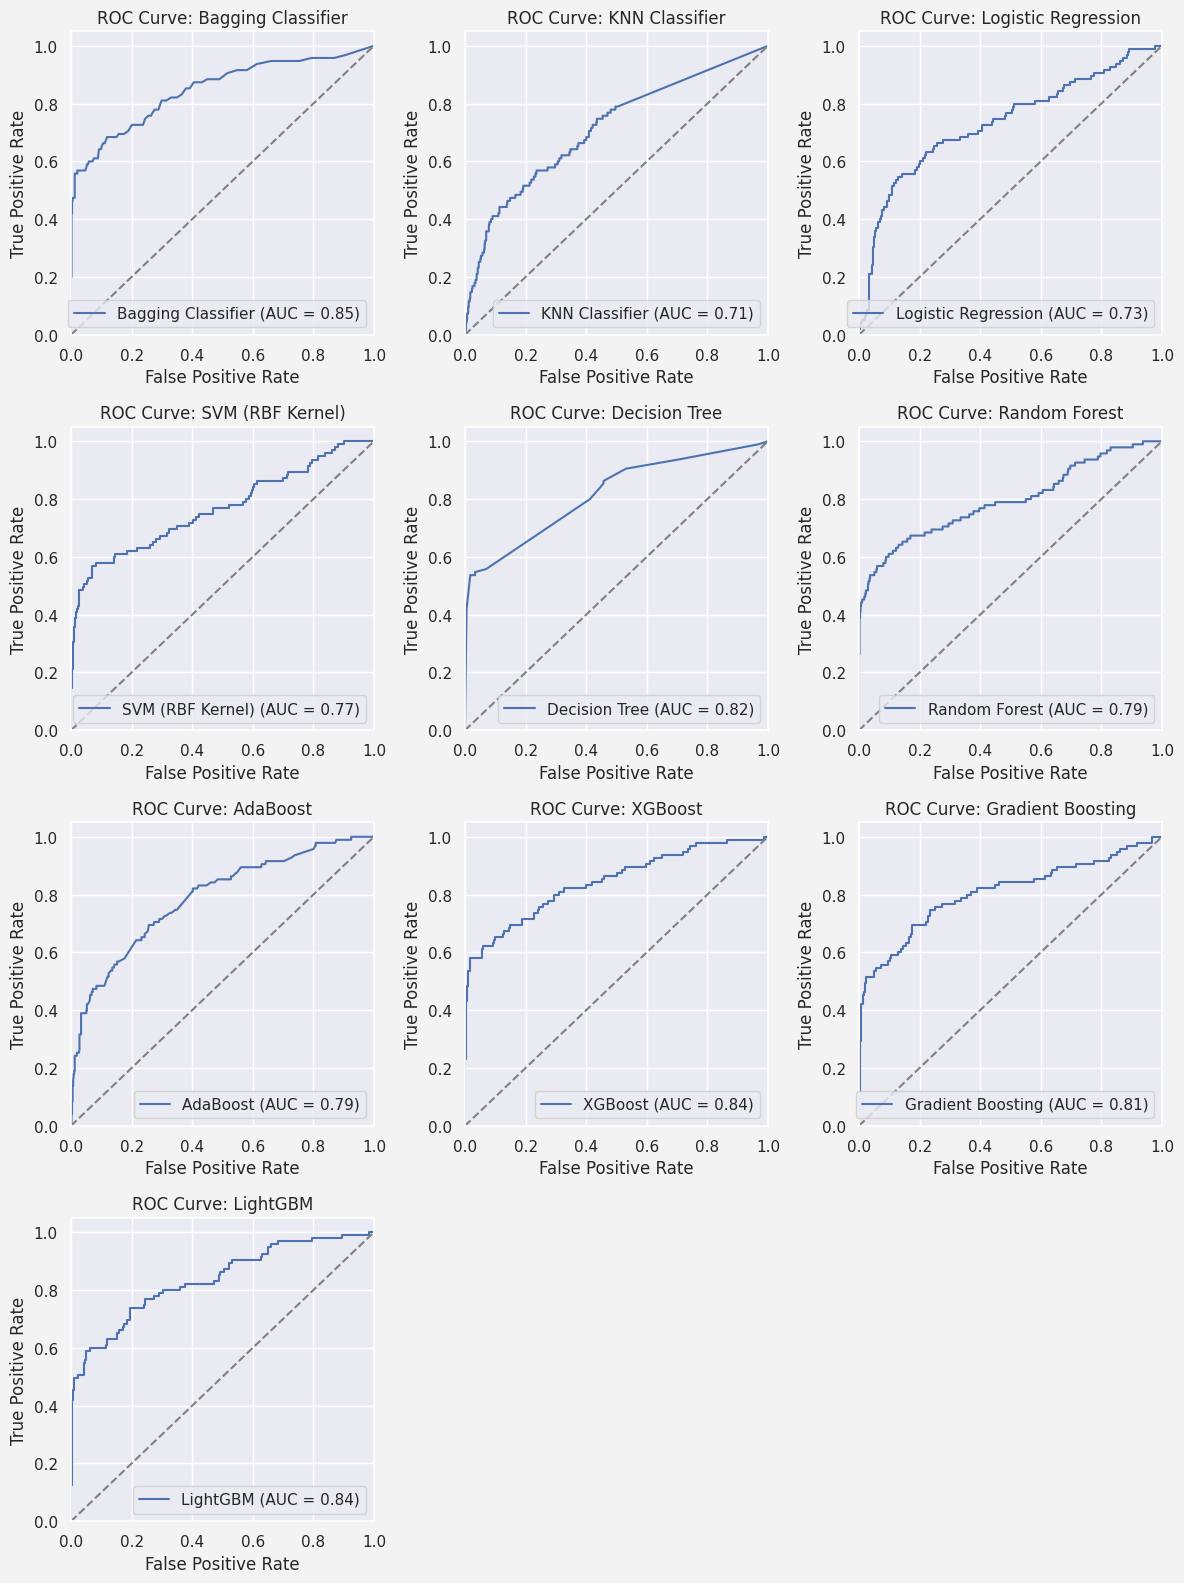

In [81]:


def rocplot(modeldict, df_train, df_test, target_train, target_test, figcolnumber):
    # Create a figure with multiple subplots
    fig = plt.figure(figsize=(4*figcolnumber, 4*ceil(len(modeldict)/figcolnumber)))
    fig.set_facecolor("#F3F3F3")  # Set background color of the figure

    for name, figpos in itertools.zip_longest(modeldict, range(len(modeldict))):
        # Define subplot positions
        plt.subplot(ceil(len(modeldict)/figcolnumber), figcolnumber, figpos+1)

        # Train the model
        model = modeldict[name]
        model.fit(df_train, target_train)

        # Predict probabilities for the test set
        y_prob = model.predict_proba(df_test)[:, 1]

        # Calculate ROC curve and AUC
        fpr, tpr, _ = roc_curve(target_test, y_prob)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve: {name}')
        plt.legend(loc="lower right")

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Call the function with your data
rocplot(
    modeldict=models,
    df_train=X_train,
    df_test=X_test,
    target_train=y_train,
    target_test=y_test,
    figcolnumber=3
)



Best Model:
 - The Bagging Classifier has the highest AUC score of 0.85, making it the best-performing model in this comparison.

- However, XGBoost and LightGBM are very close with AUC = 0.84, so they also demonstrate excellent performance and can be considered strong alternatives.

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 388, number of negative: 2278
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1490
[LightGBM] [Info] Number of data points in the train set: 2666, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.145536 -> initscore=-1.770048
[LightGBM] [Info] Start training from score -1.770048
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

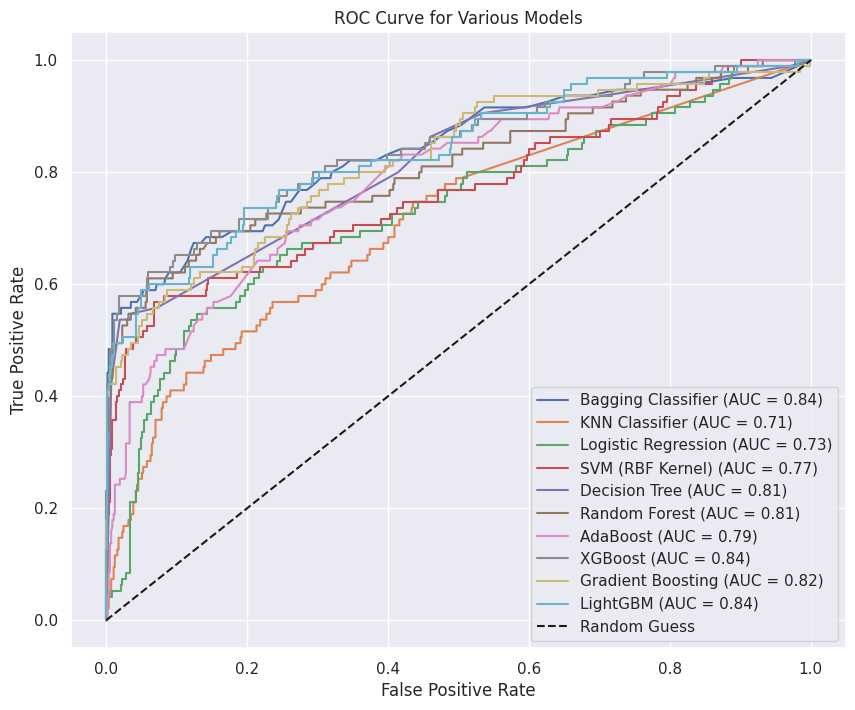

                 Model     AUC
0   Bagging Classifier  0.8369
1       KNN Classifier  0.7120
2  Logistic Regression  0.7335
3     SVM (RBF Kernel)  0.7669
4        Decision Tree  0.8144
5        Random Forest  0.8129
6             AdaBoost  0.7883
7              XGBoost  0.8432
8    Gradient Boosting  0.8213
9             LightGBM  0.8358


In [84]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np

# List to store model performance
model_auc_results = []

# Plot ROC Curves for each model
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict the probabilities for the test data (important for ROC AUC)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    if y_prob is not None:
        # Compute the ROC AUC score
        auc_score = roc_auc_score(y_test, y_prob)

        # Get the false positive rate, true positive rate, and thresholds
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

        # Append the model results
        model_auc_results.append({
            "Model": name,
            "AUC": auc_score
        })

# Add a diagonal line (representing random chance)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Set plot labels and title
plt.title('ROC Curve for Various Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Create a DataFrame for AUC results
auc_results_df = pd.DataFrame(model_auc_results)
auc_results_df = auc_results_df.round(4)

# Display AUC results
print(auc_results_df)


From the ROC Curve and AUC (Area Under the Curve) values shown in the plot:

- Bagging Classifier, XGBoost, and LightGBM achieve the highest AUC = 0.84, making them the best-performing models based on ROC-AUC.
- Gradient Boosting follows closely with an AUC = 0.82.
Models like Decision Tree and Random Forest perform slightly lower, with AUC = 0.81.

  Final Recommendation:
- Bagging Classifier, XGBoost, and LightGBM are the best models based on their AUC scores.


## Model Selection

Final Conclusion:

Best Model: XGBoost

- Balanced Accuracy, Recall, Precision, and f1-score.
- Very competitive ROC-AUC score (0.8432).
- Good generalization and low misclassification rates.
Close Competitors:

- Bagging Classifier (Highest AUC but lower Recall).
- LightGBM (Balanced performance but slightly lower AUC).

##Deployment

In [99]:
filename_bagging = 'bagging_model.sav'
pickle.dump(bagging_model, open(filename_bagging, 'wb'))

filename_lgbm = 'lgbm_model.sav'
pickle.dump(lgbm_model, open(filename_lgbm, 'wb'))

filename_gbm = 'gbm_model.sav'
pickle.dump(gbm_model, open(filename_gbm, 'wb'))

filename_xgb = 'xgb_model.sav'
pickle.dump(xgb_model, open(filename_xgb, 'wb'))

print("All models saved successfully!")

All models saved successfully!


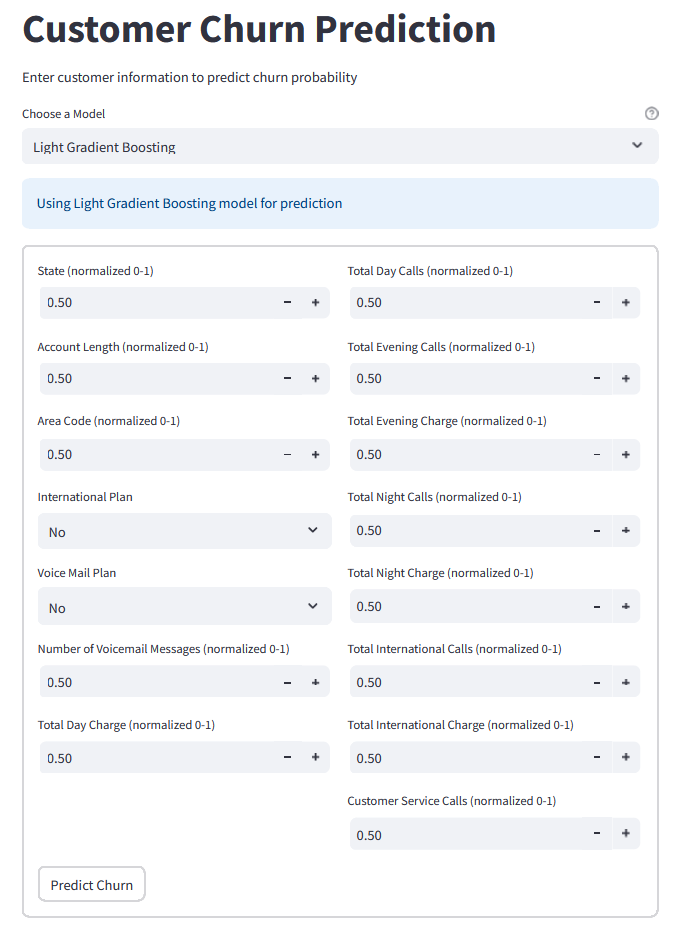

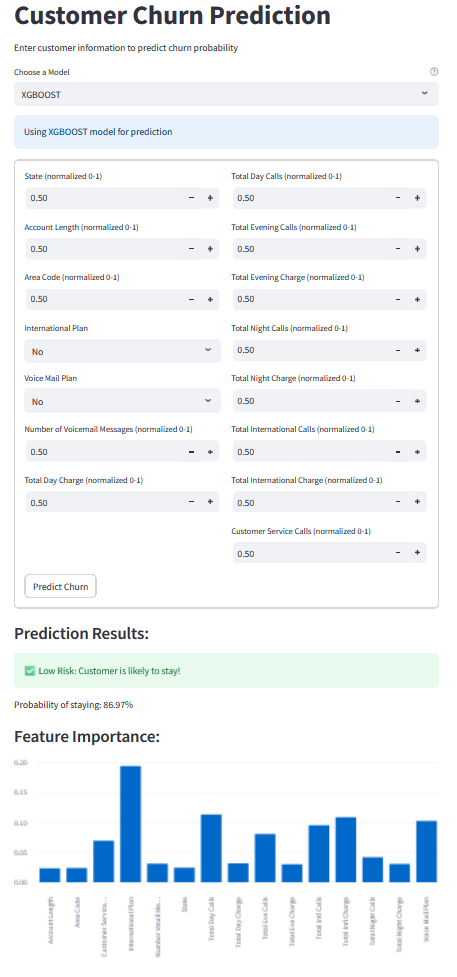